# EDA of Household Income 

## Importing Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
import warnings
warnings.filterwarnings("ignore")

## Reading File

In [33]:
df = pd.read_csv('data.csv')

## Understanding Dataset

In [34]:
df

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,58,High School,Others,0,Suburban,26,Divorced,Full-time,6,Own,Townhouse,Female,Car,74994
9996,23,Master's,Technology,3,Urban,16,Divorced,Full-time,1,Own,Single-family home,Female,Biking,72676
9997,41,Doctorate,Education,3,Urban,50,Single,Full-time,4,Own,Single-family home,Female,Public transit,2684820
9998,44,High School,Education,0,Urban,3,Married,Part-time,1,Own,Single-family home,Male,Biking,57955


In [35]:
df.columns 

Index(['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents',
       'Location', 'Work_Experience', 'Marital_Status', 'Employment_Status',
       'Household_Size', 'Homeownership_Status', 'Type_of_Housing', 'Gender',
       'Primary_Mode_of_Transportation', 'Income'],
      dtype='object')

In [36]:
df.shape

(10000, 14)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             10000 non-null  int64 
 1   Education_Level                 10000 non-null  object
 2   Occupation                      10000 non-null  object
 3   Number_of_Dependents            10000 non-null  int64 
 4   Location                        10000 non-null  object
 5   Work_Experience                 10000 non-null  int64 
 6   Marital_Status                  10000 non-null  object
 7   Employment_Status               10000 non-null  object
 8   Household_Size                  10000 non-null  int64 
 9   Homeownership_Status            10000 non-null  object
 10  Type_of_Housing                 10000 non-null  object
 11  Gender                          10000 non-null  object
 12  Primary_Mode_of_Transportation  10000 non-null 

## Exploring for Null Values

In [38]:
df.isnull().sum()

Age                               0
Education_Level                   0
Occupation                        0
Number_of_Dependents              0
Location                          0
Work_Experience                   0
Marital_Status                    0
Employment_Status                 0
Household_Size                    0
Homeownership_Status              0
Type_of_Housing                   0
Gender                            0
Primary_Mode_of_Transportation    0
Income                            0
dtype: int64

In [39]:
df['Primary_Mode_of_Transportation'].unique()

array(['Public transit', 'Biking', 'Car', 'Walking'], dtype=object)

In [40]:
df['Type_of_Housing'].unique()

array(['Apartment', 'Single-family home', 'Townhouse'], dtype=object)

## Graphs and Charts
### Education Level Vs Income 

<Axes: xlabel='Education_Level'>

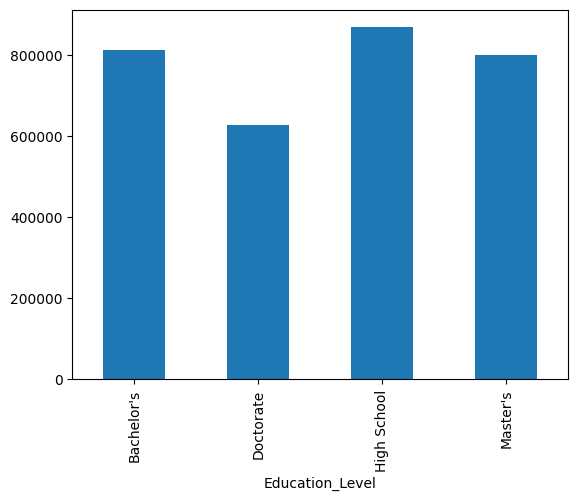

In [41]:
df.groupby('Education_Level')['Income'].agg('mean').plot(kind = 'bar')

People with High School Education as their Highest level of education earns more as compared to the other higher education levels.

In [42]:
df['Education_Level'].value_counts()

Education_Level
Bachelor's     4058
High School    2959
Master's       2482
Doctorate       501
Name: count, dtype: int64

### Employement Status Vs Income of High School Student 

<Axes: xlabel='Employment_Status'>

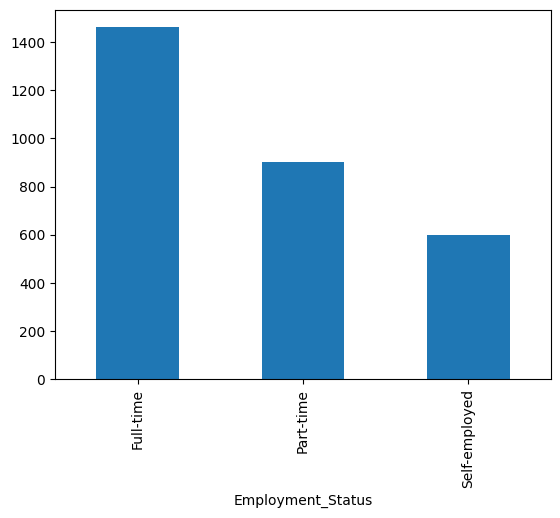

In [43]:
df.groupby('Education_Level').get_group('High School')['Employment_Status'].value_counts().plot(kind = 'bar')

<Axes: ylabel='count'>

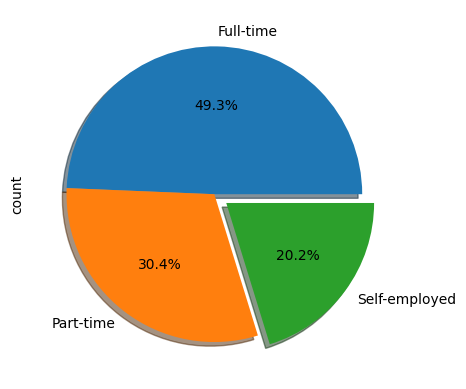

In [60]:
df.groupby('Education_Level').get_group('High School')['Employment_Status'].value_counts().plot(kind = 'pie', autopct='%1.1f%%', legend = False, shadow = True, explode=(0, 0, 0.1), startangle = 0)

Among people with High School education 49.3% do full time job, 30.4% do Part-Time job and 20.2% are self-Employed.

In [44]:
df_HS = df.where(df['Education_Level'] == 'High School')

<Axes: xlabel='Employment_Status', ylabel='Income'>

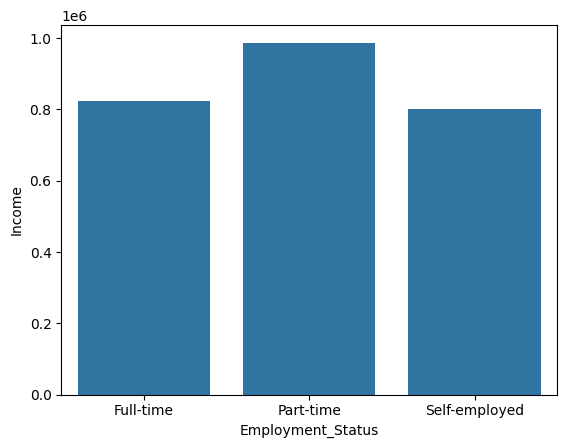

In [45]:
df_HSM = df_HS.groupby('Employment_Status').mean(numeric_only = True)
sns.barplot(df_HSM, x = 'Employment_Status', y = 'Income' )

Among Part-Timer, Full-Timer and self-employed, Part-Timer erans the most.

### Count of Categorical Values

In [46]:
cats = ["Education_Level", "Occupation", "Number_of_Dependents",
       "Location", "Marital_Status", "Employment_Status", "Household_Size",
       "Homeownership_Status", "Type_of_Housing", "Gender", "Primary_Mode_of_Transportation"]

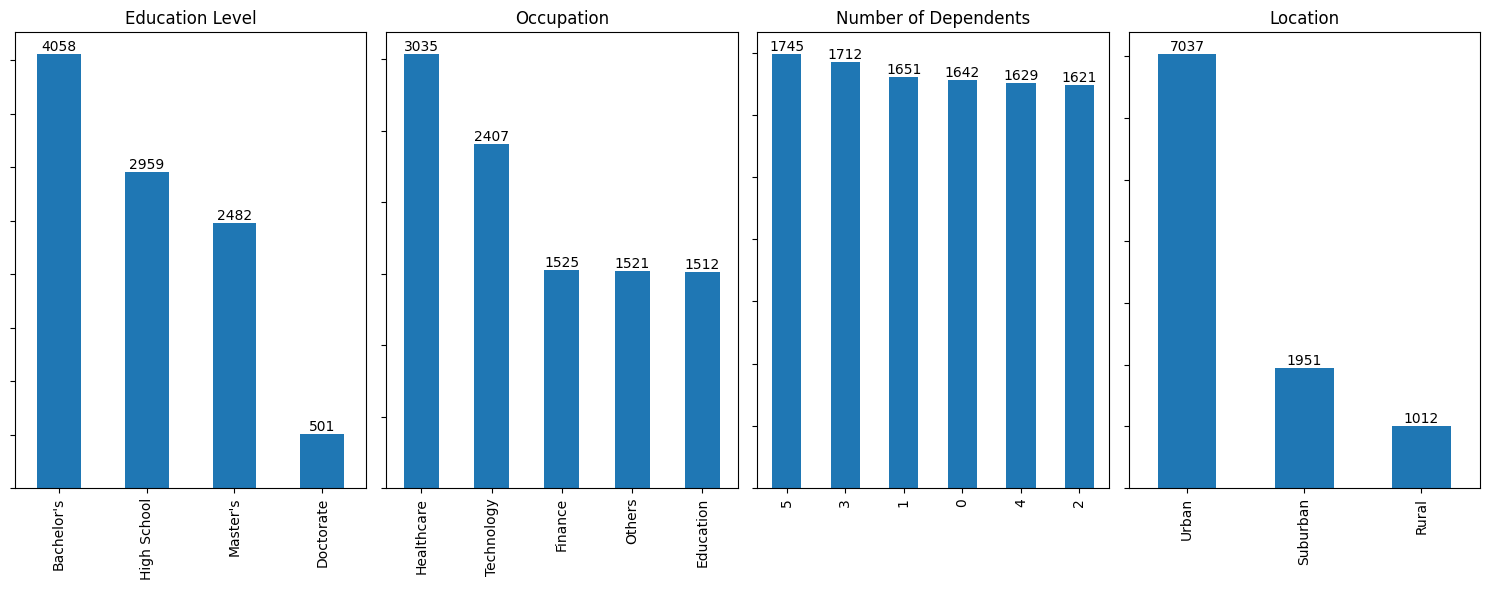

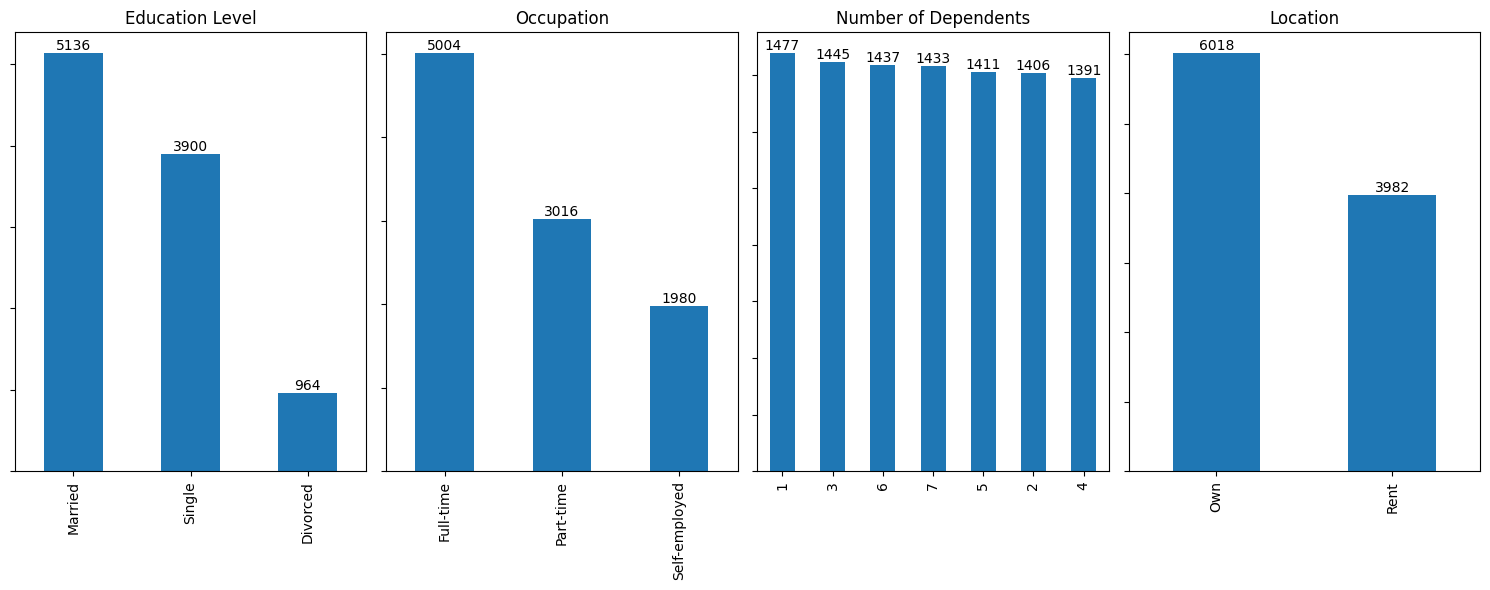

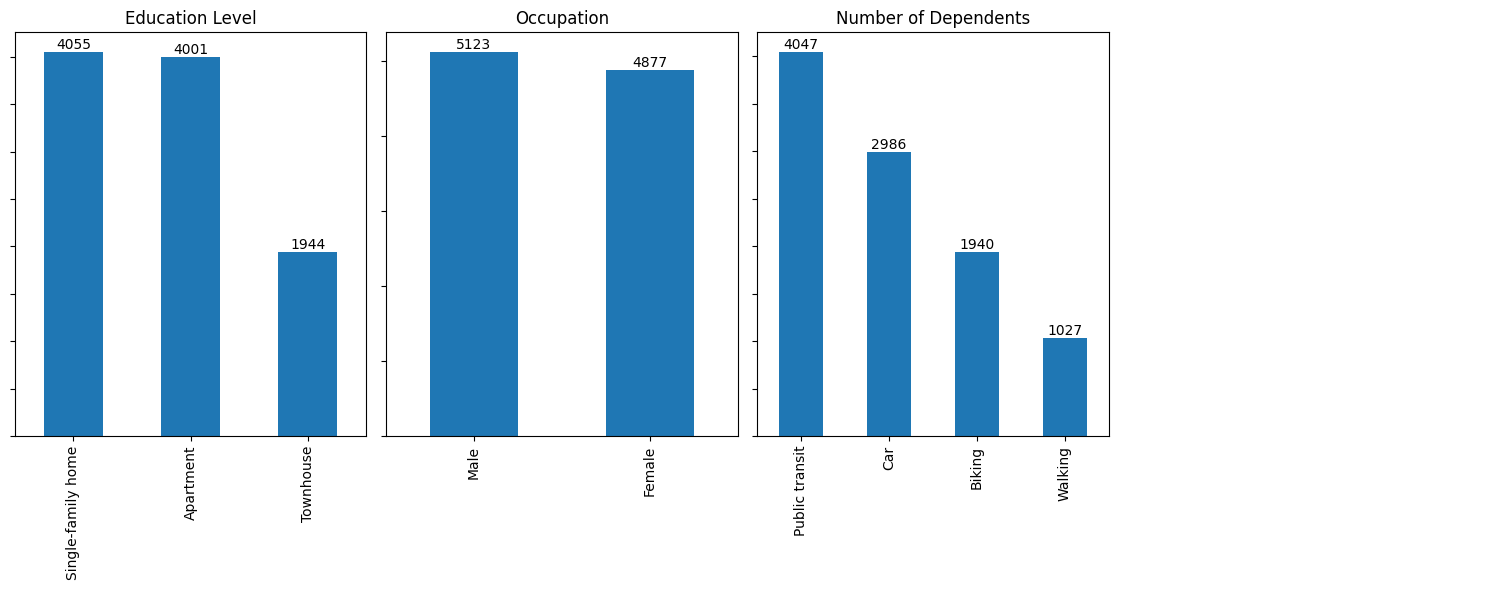

In [47]:
index = 0

for j in range(2):
    fig, axes = plt.subplots(ncols = 4, figsize = (15, 6))
    
    for i in range(4):
        count = df[cats[index]].value_counts()
        count.plot(kind = 'bar', ax = axes[i])
        for container in axes[i].containers:
            axes[i].bar_label(container)
        axes[i].set_yticklabels(())
        axes[i].set_ylabel('')
        axes[i].set_xlabel('')
        axes[i].set_title(cats[i].replace('_', " "))
        index += 1
    plt.tight_layout()
    plt.show()
    
fig, axes = plt.subplots(ncols = 4, figsize = (15, 6))
for i in range(3):
    count = df[cats[index]].value_counts()
    count.plot(kind = 'bar', ax = axes[i])
    for container in axes[i].containers:
        axes[i].bar_label(container)
    axes[i].set_yticklabels(())
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].set_title(cats[i].replace('_', " "))
    index += 1
axes[3].axis('off')
plt.tight_layout()
plt.show()
    

Conclusions 
+ Bachelor is among the top choice for Education level and very few people opt for Doctorate program.
+ Healthcare and Technology are the top choices for Occupation Sector.
+ Most people love to stay in Urban Areas
+ About 40% people live on rent.

### Numerical Data Distribution 

In [48]:
nums = [i for i in df.columns if i not in cats]

In [49]:
nums

['Age', 'Work_Experience', 'Income']

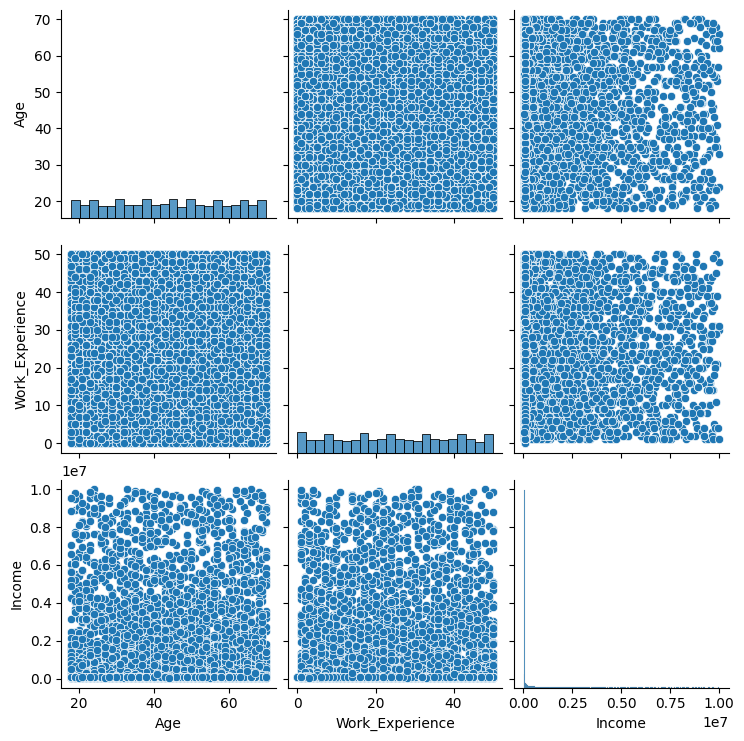

In [50]:
sns.pairplot(df, vars = nums)
plt.show()

### Distribution on Normal Curve 

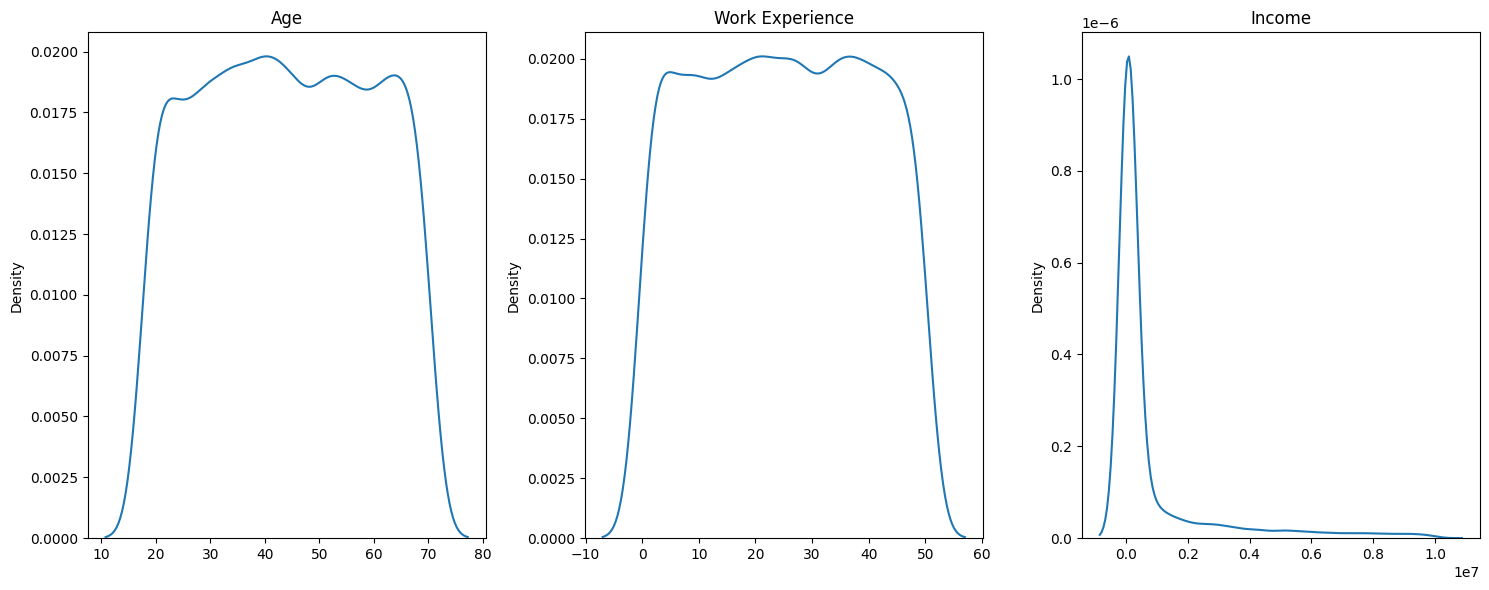

In [51]:
fig, axes = plt.subplots(ncols = 3, figsize = (15, 6))

for i, j in enumerate(nums):
    sns.kdeplot(df, x = nums[i], ax = axes[i])
    axes[i].set_title(j.replace('_', ' '))
    axes[i].set_xlabel('')
plt.tight_layout()
plt.show()

Large portion of Population earns less than a million per year. Only few exceptions earns more than a million upto 10 million per year.

### Numerical Distribution on Box plot

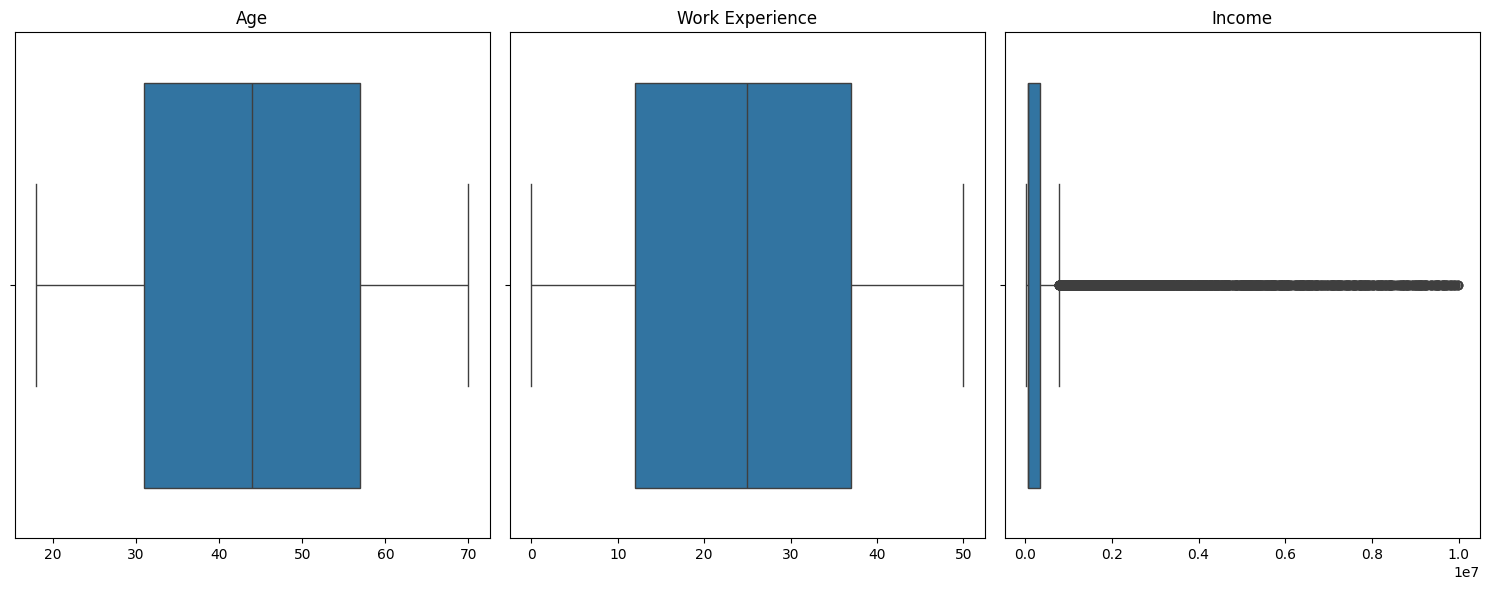

In [52]:
fig, axes = plt.subplots(ncols = 3, figsize = (15, 6))

for i, j in enumerate(nums):
    sns.boxplot(df, x = nums[i], ax = axes[i])
    axes[i].set_title(j.replace('_', ' '))
    axes[i].set_xlabel('')
plt.tight_layout()
plt.show()

### Mean numerical values among categories

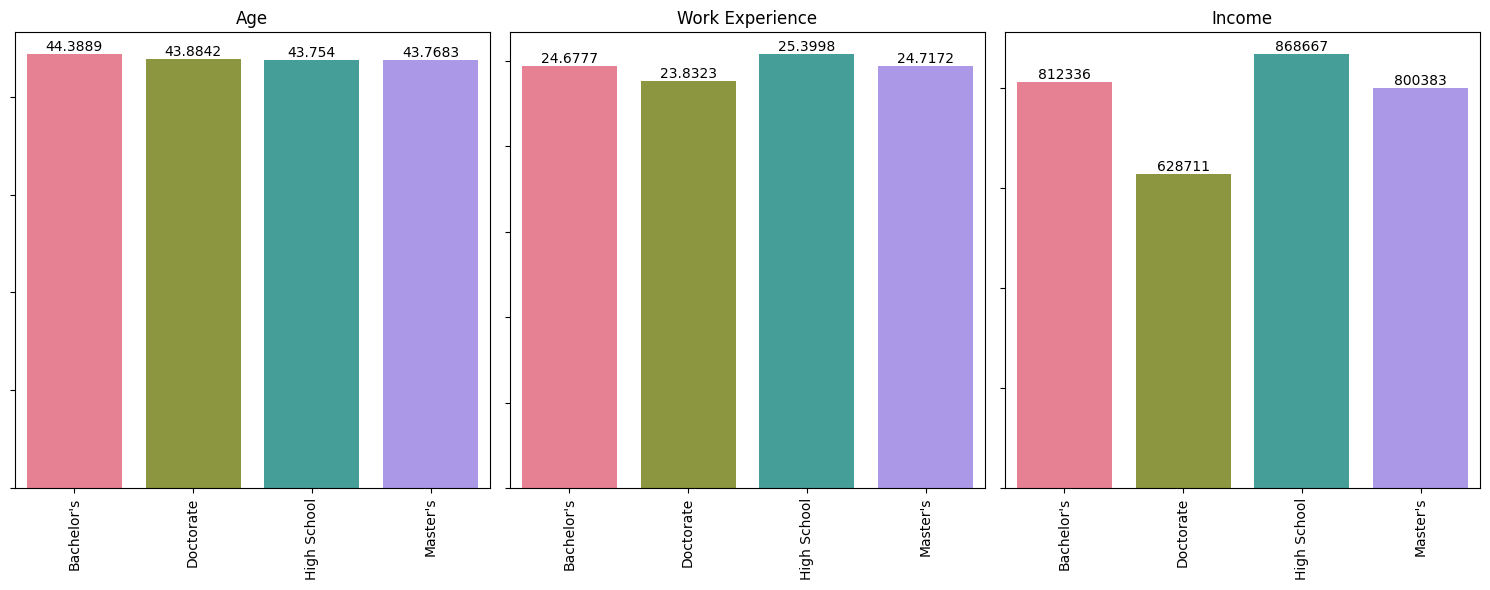

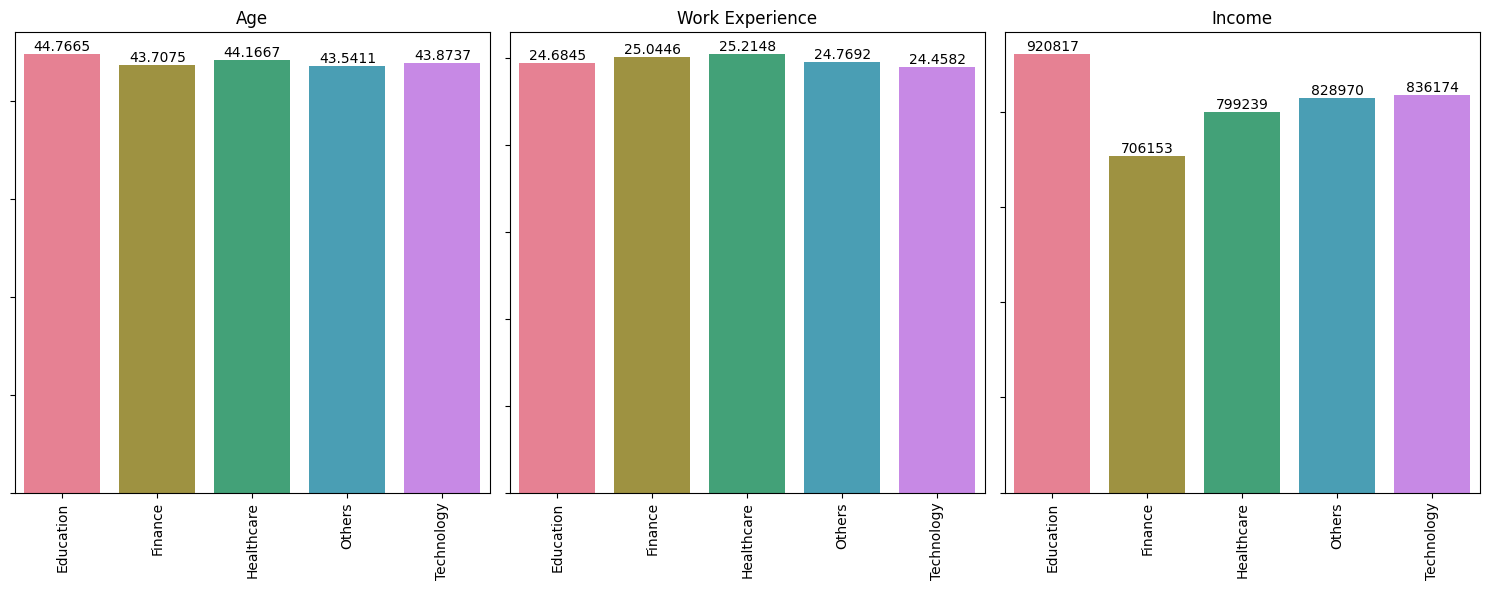

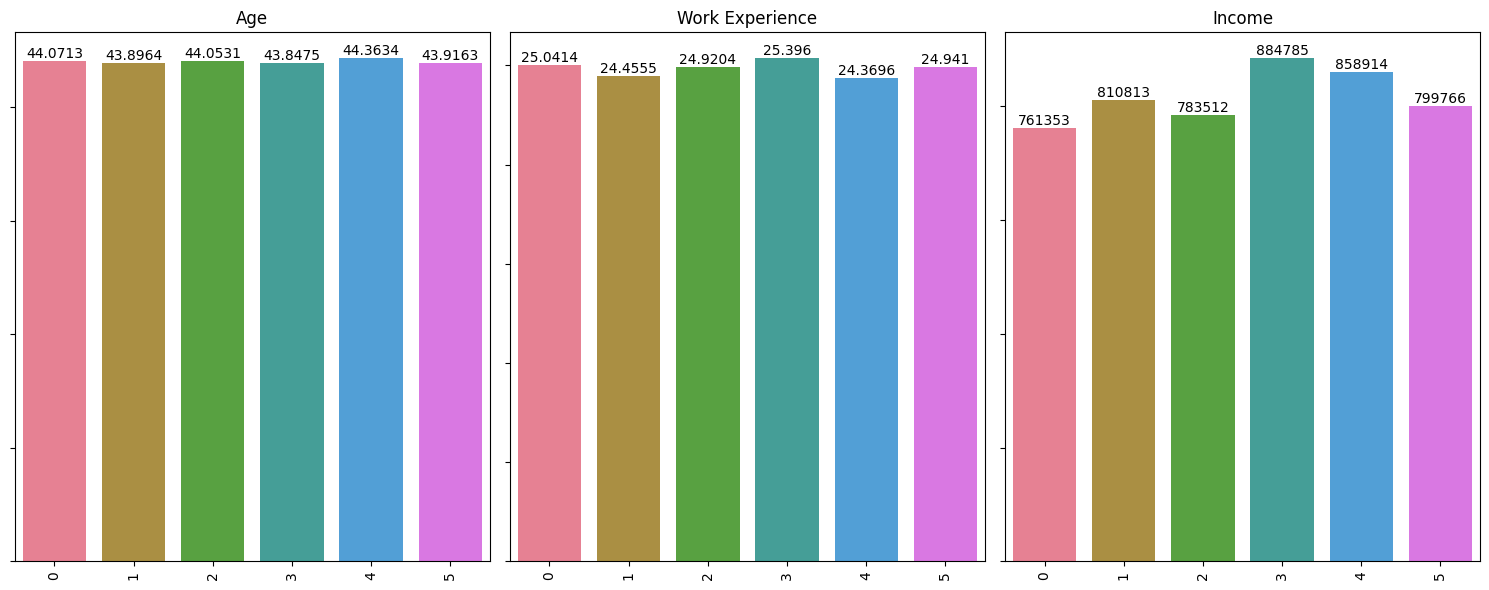

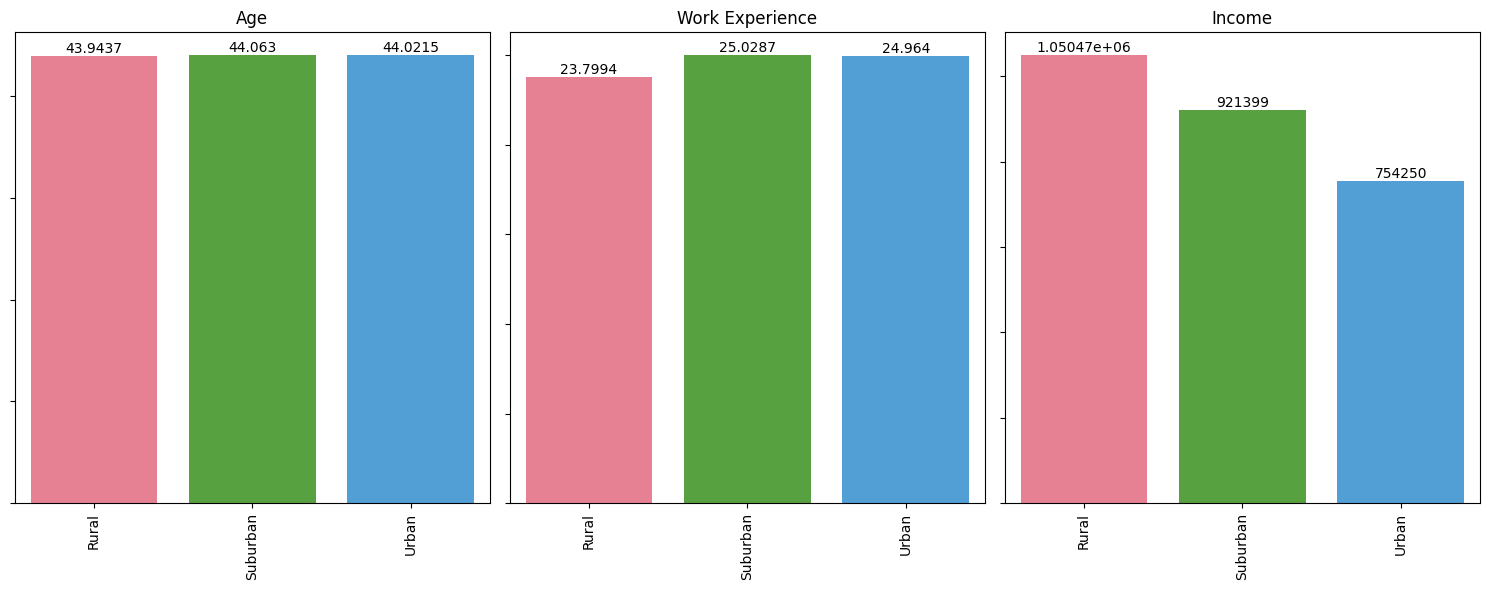

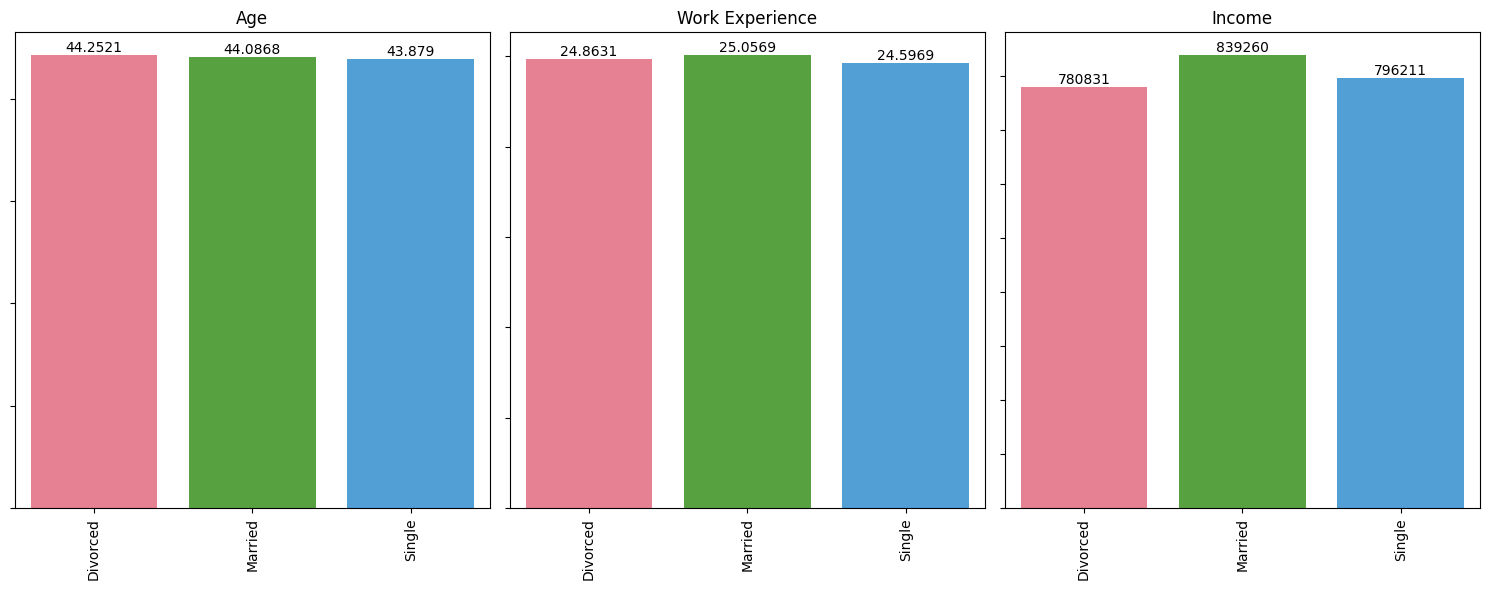

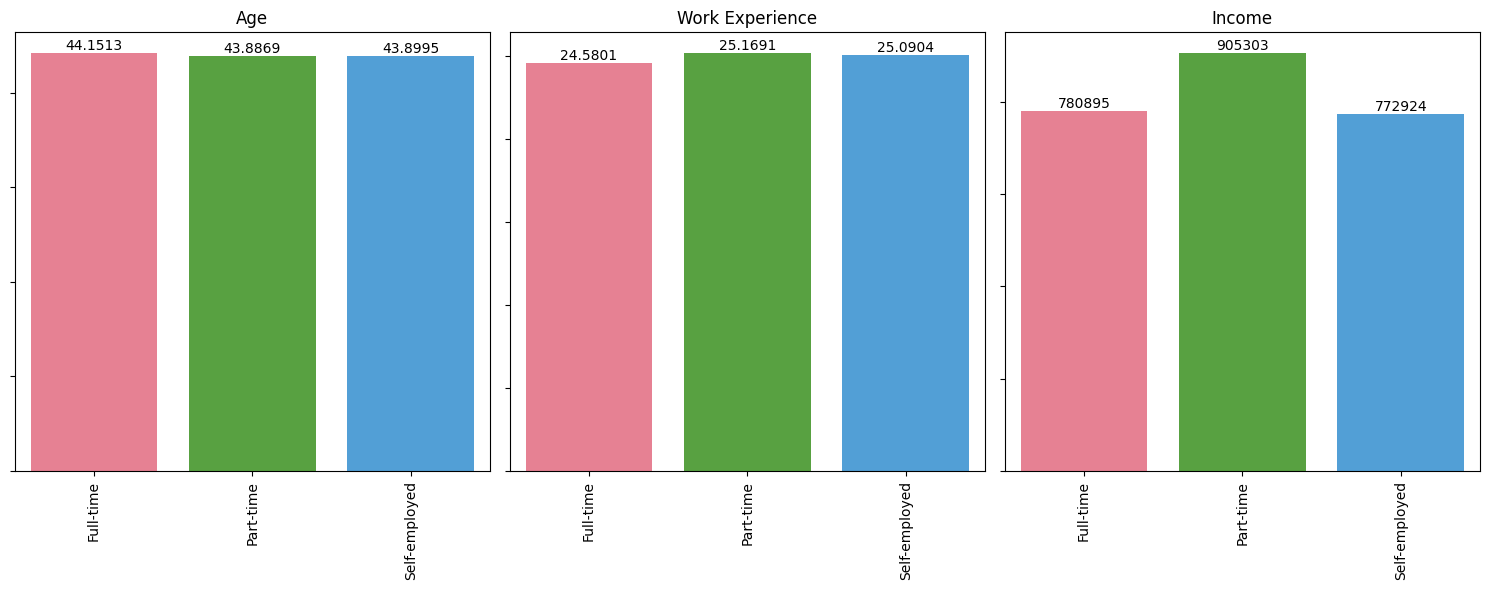

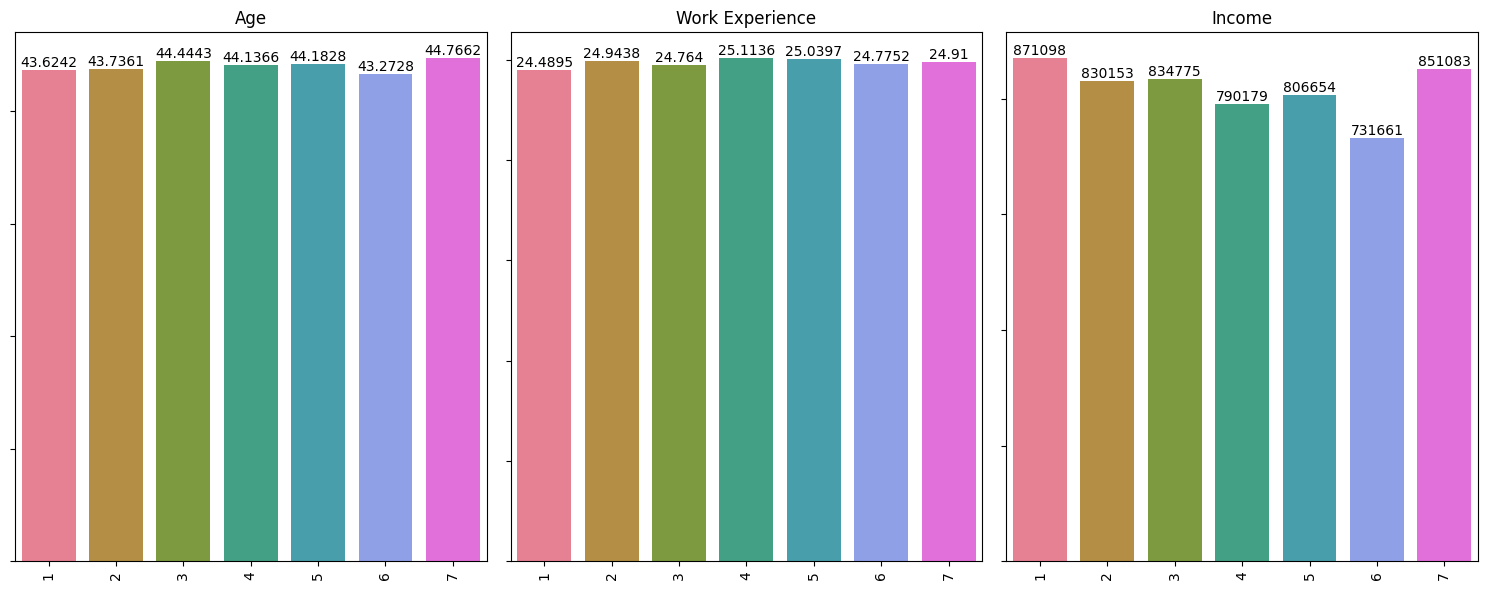

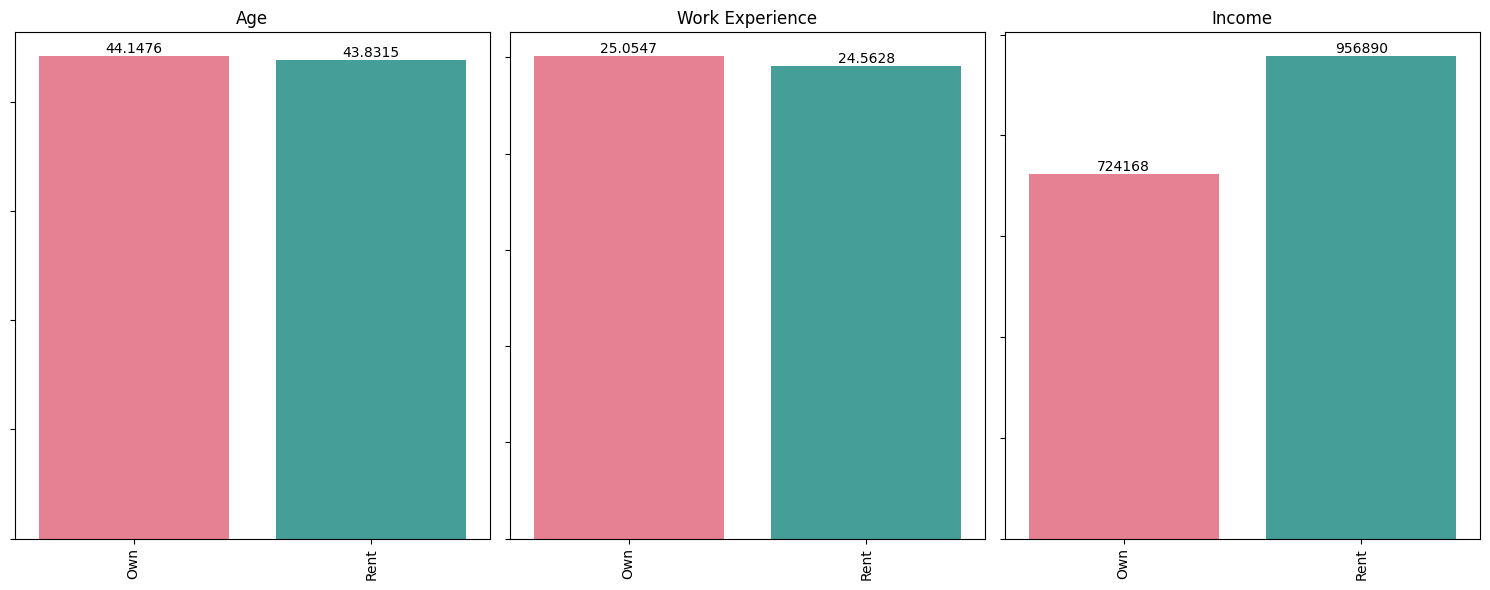

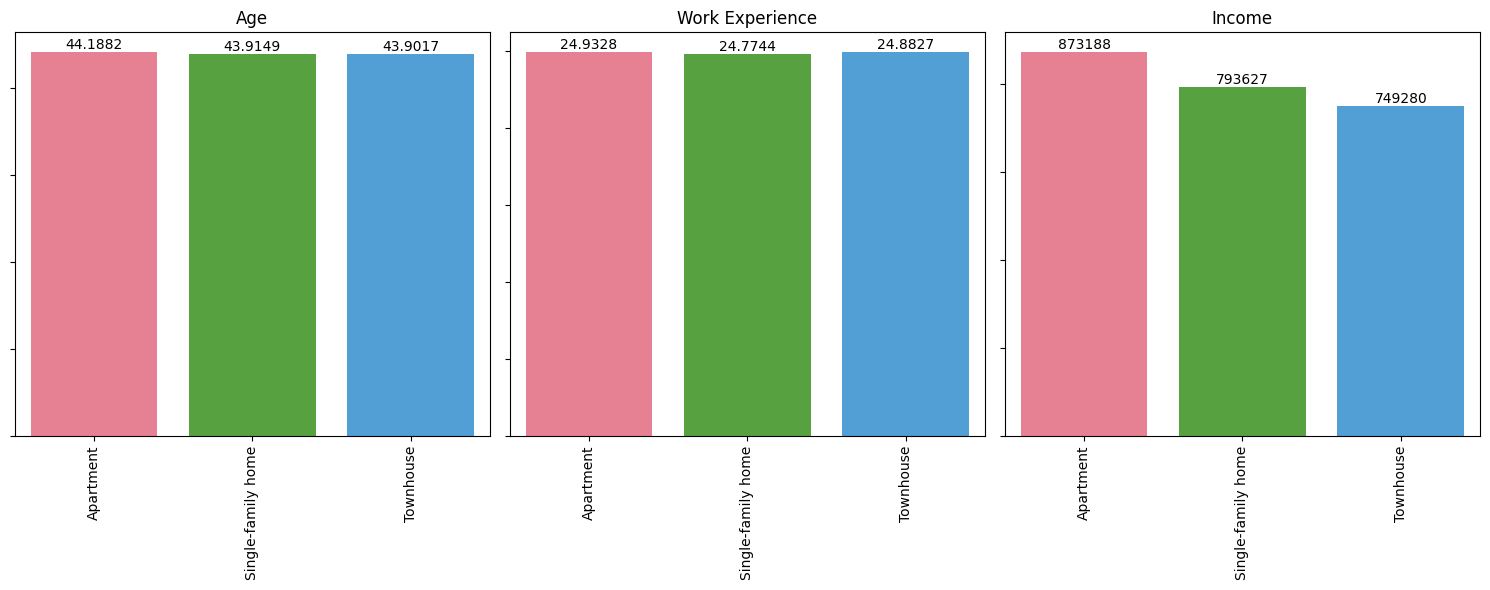

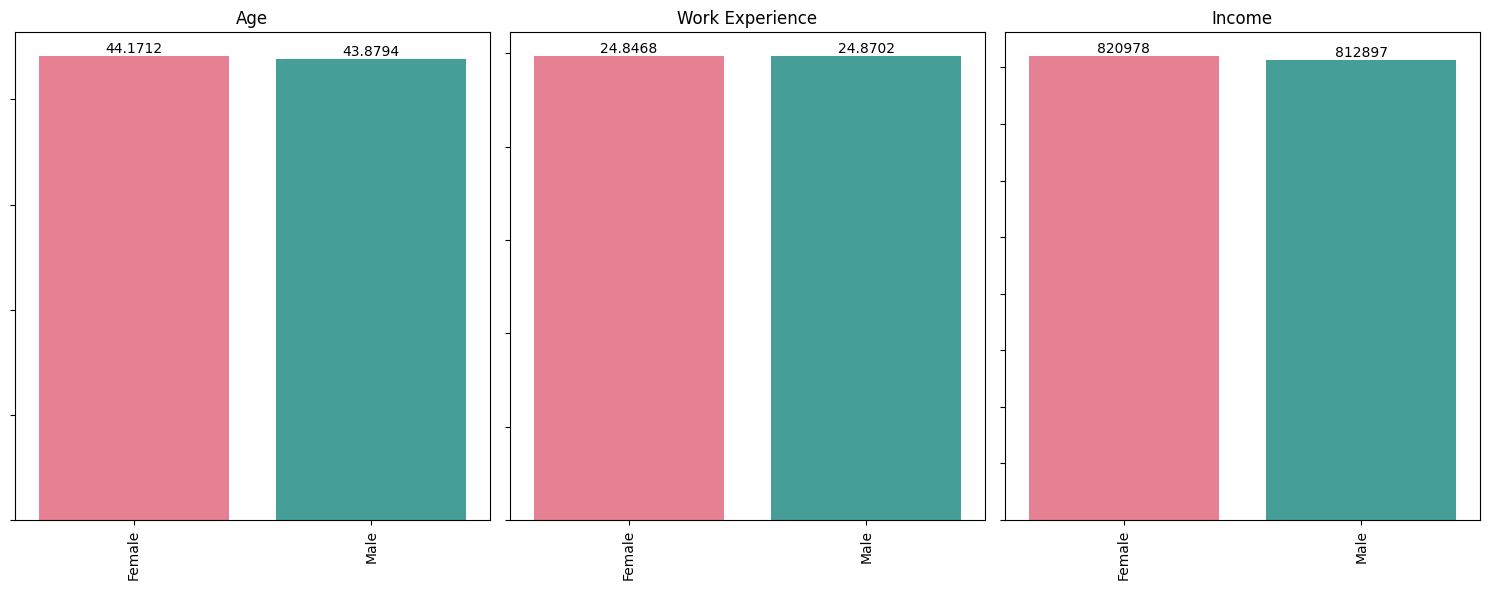

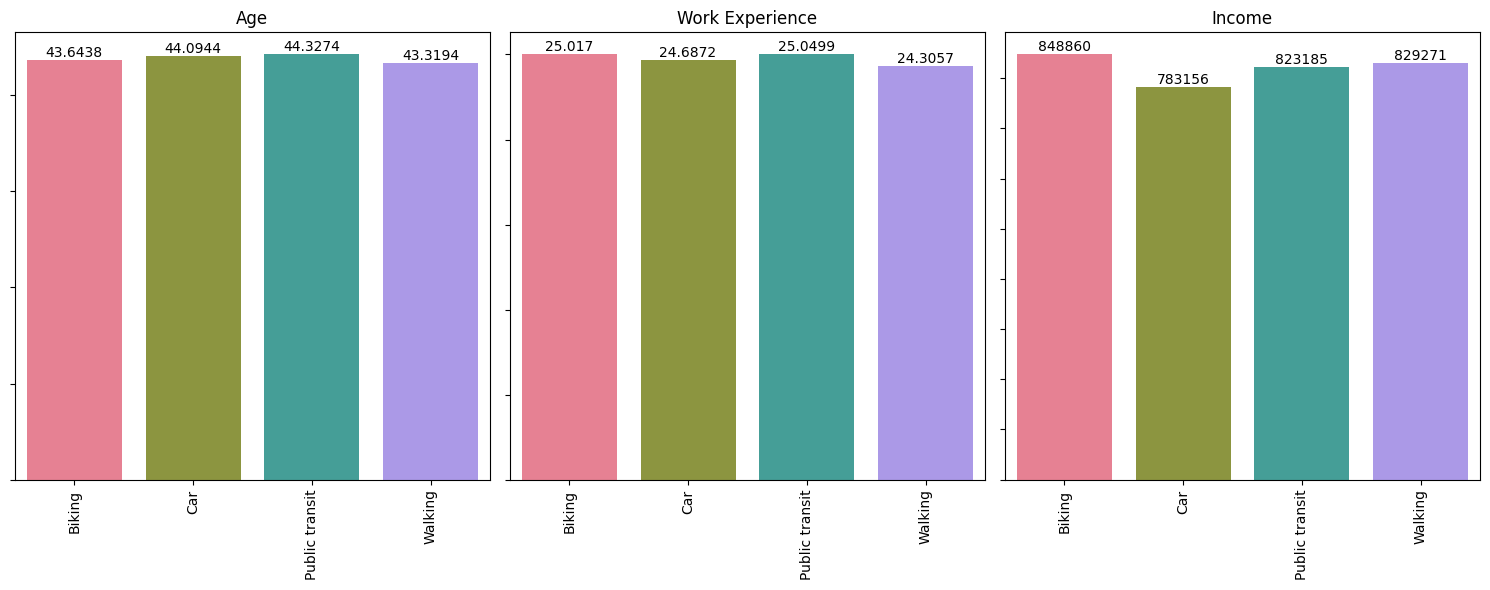

In [53]:
for k in cats:
    display(HTML("<h2>{}</h2>".format(k.replace('_', ' '))))
    fig, axes = plt.subplots(ncols = 3, figsize = (15, 6))
    grouped = df.groupby(k)
    
    for i, j in enumerate(nums):
        mean = grouped[j].mean()
        sns.barplot(x = mean.index, y = mean, palette = 'husl', ax = axes[i])
        for container in axes[i].containers:
            axes[i].bar_label(container)
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation = 90)
        axes[i].set_yticklabels(())
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].set_title(j.replace('_', ' '))
    plt.tight_layout()
    plt.show()

Conclusions 
+ Education and Technology are top sectors in providing higher salary.
+ The Interesting thing is that the people who live in rural areas earns more on an average as compared to urban and suburban areas.
+ People with less number of Dependents earns most.
+ People having higher Income on an average mostly lives on rent.

### Numerical data density distribution among groups

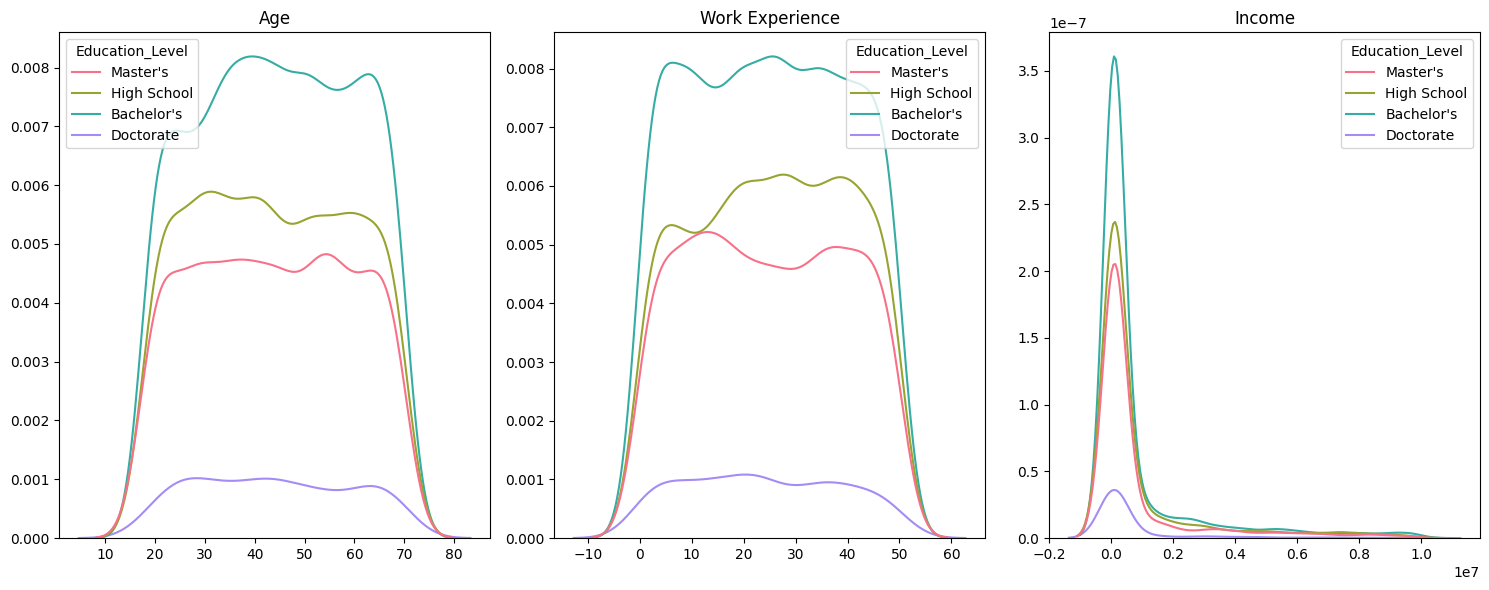

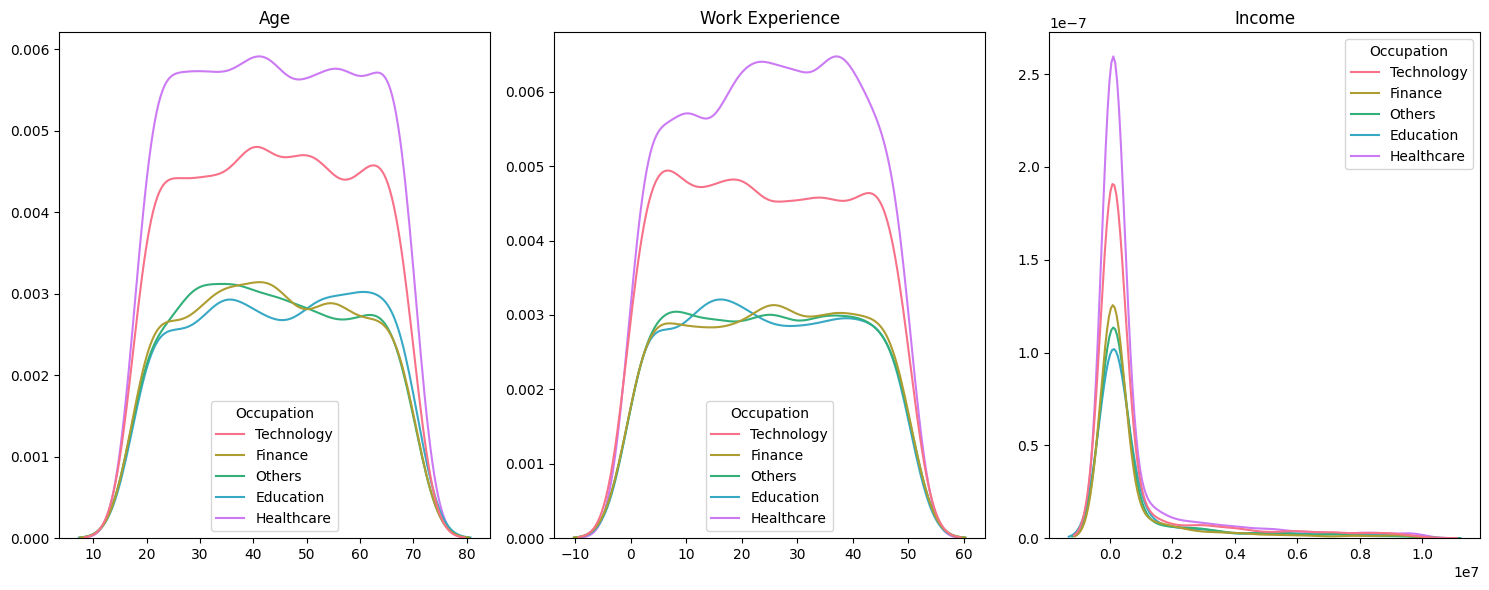

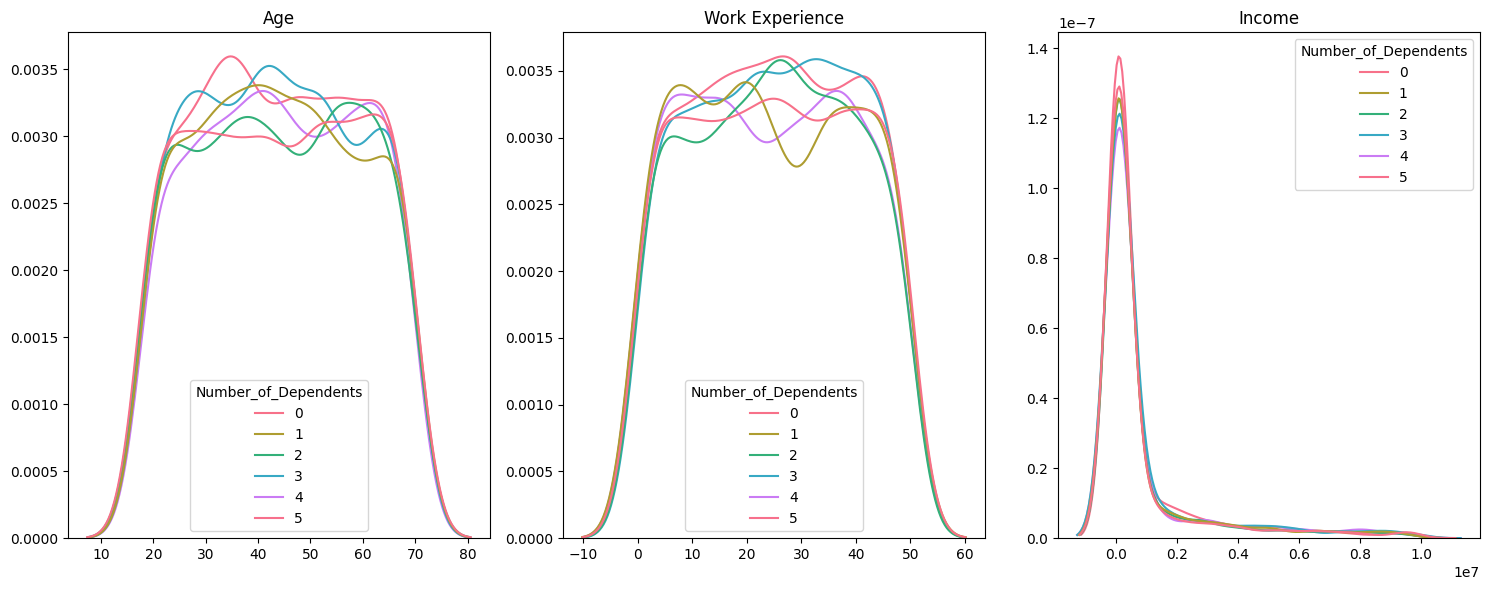

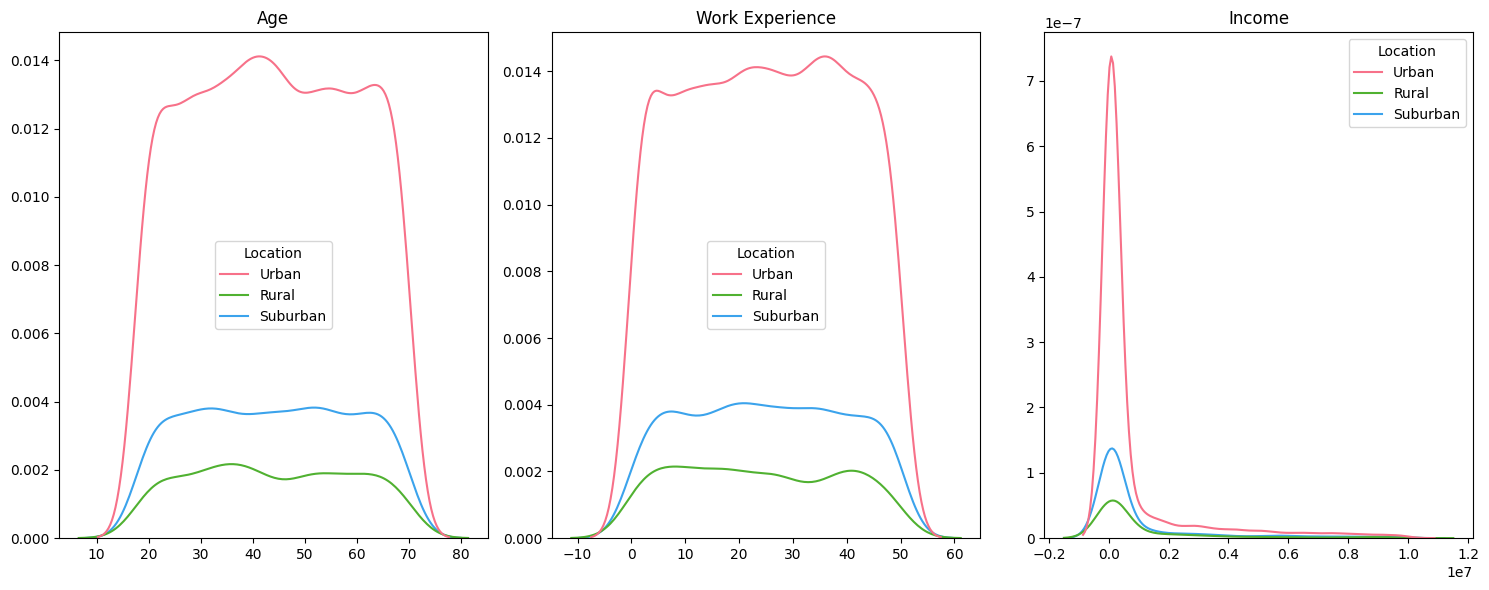

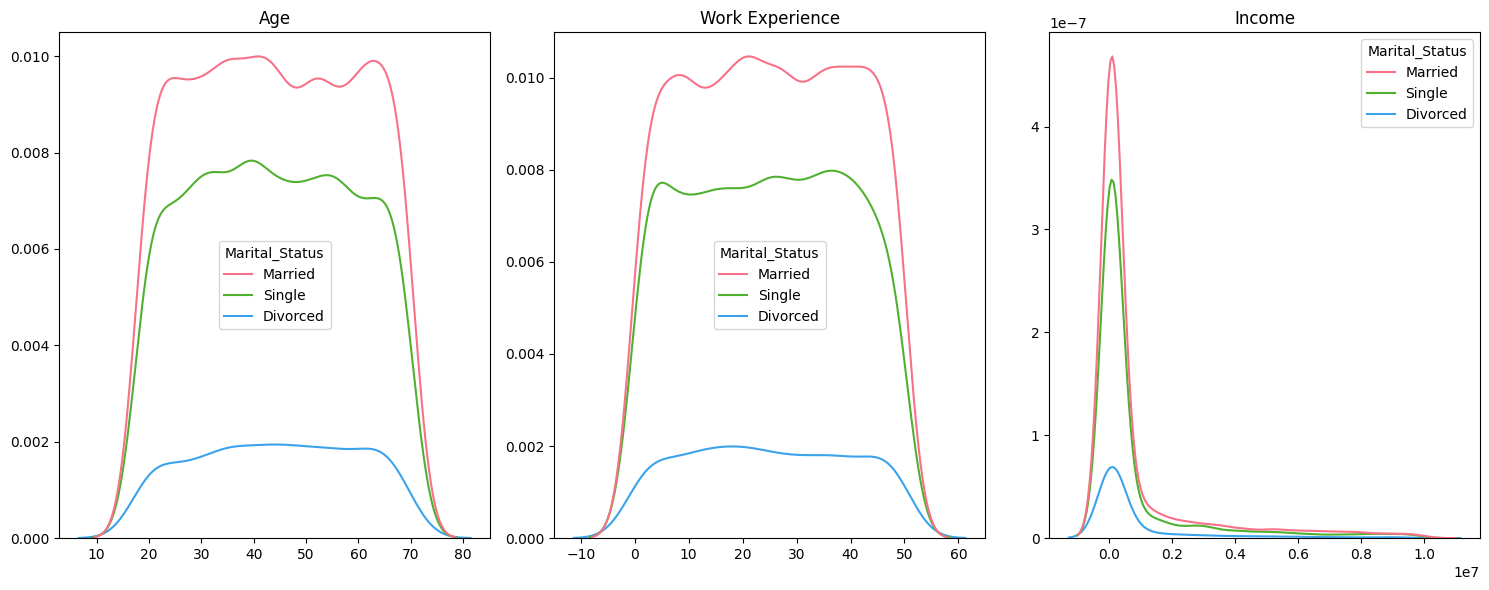

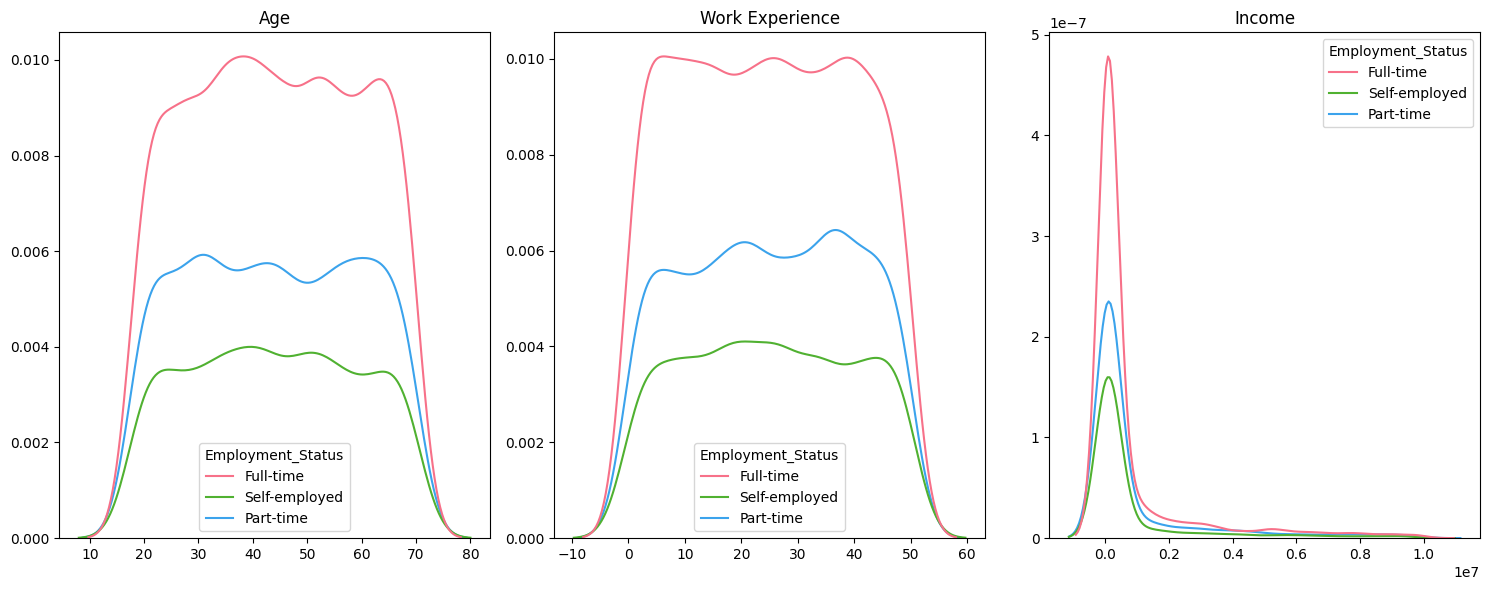

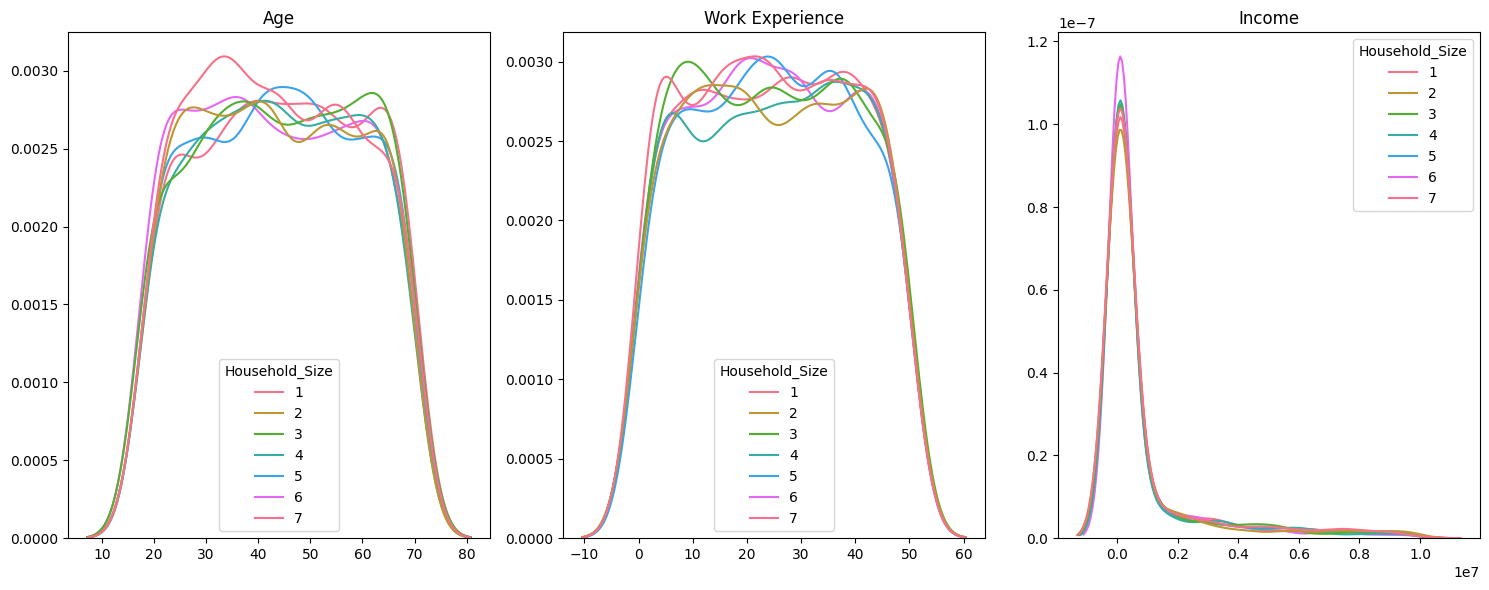

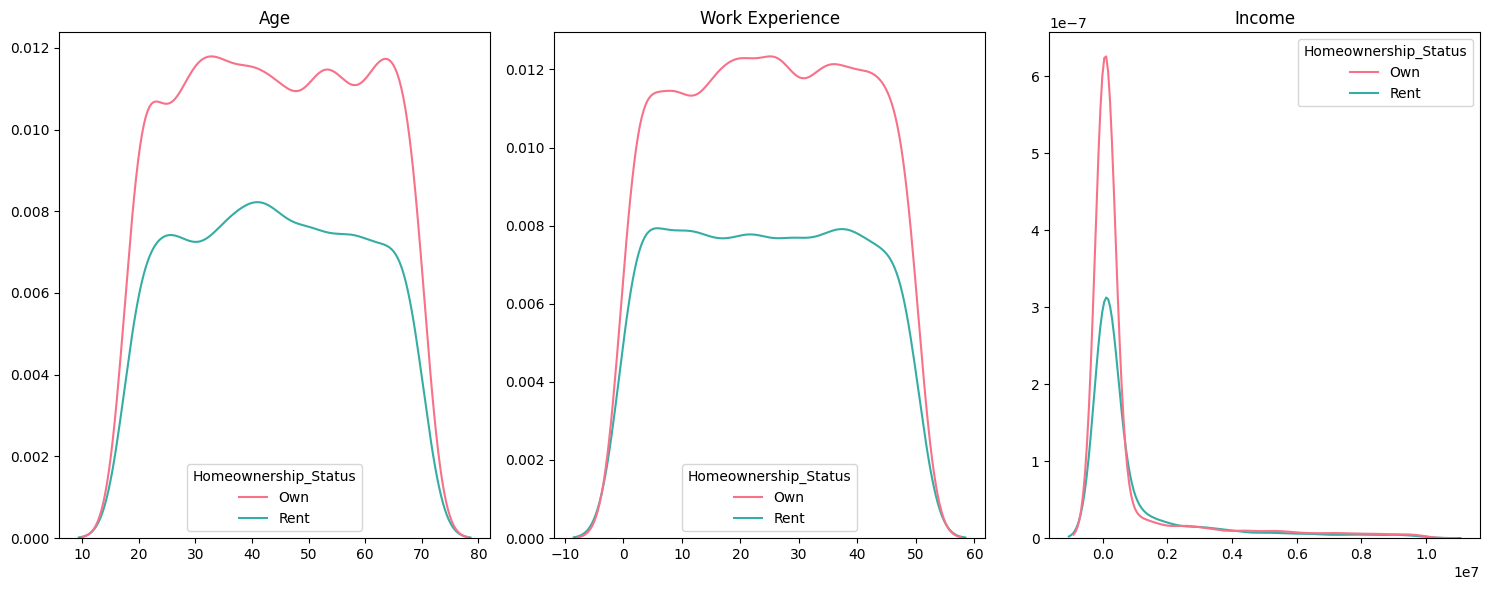

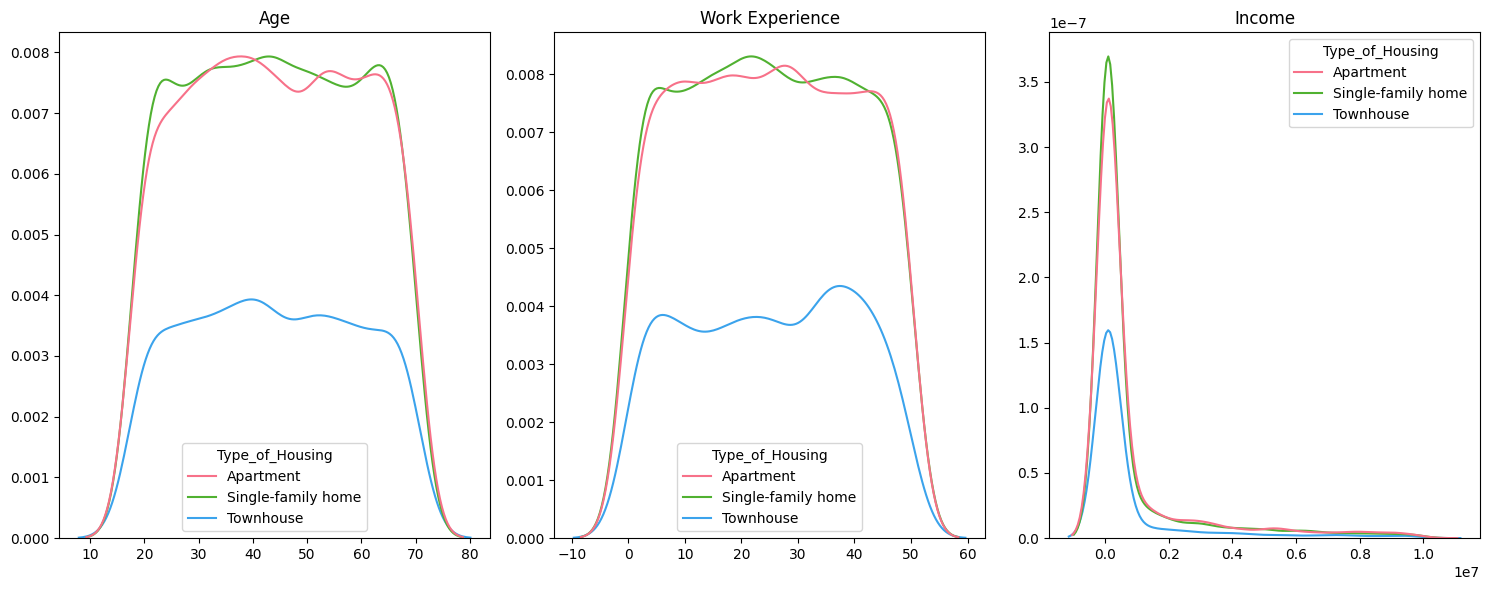

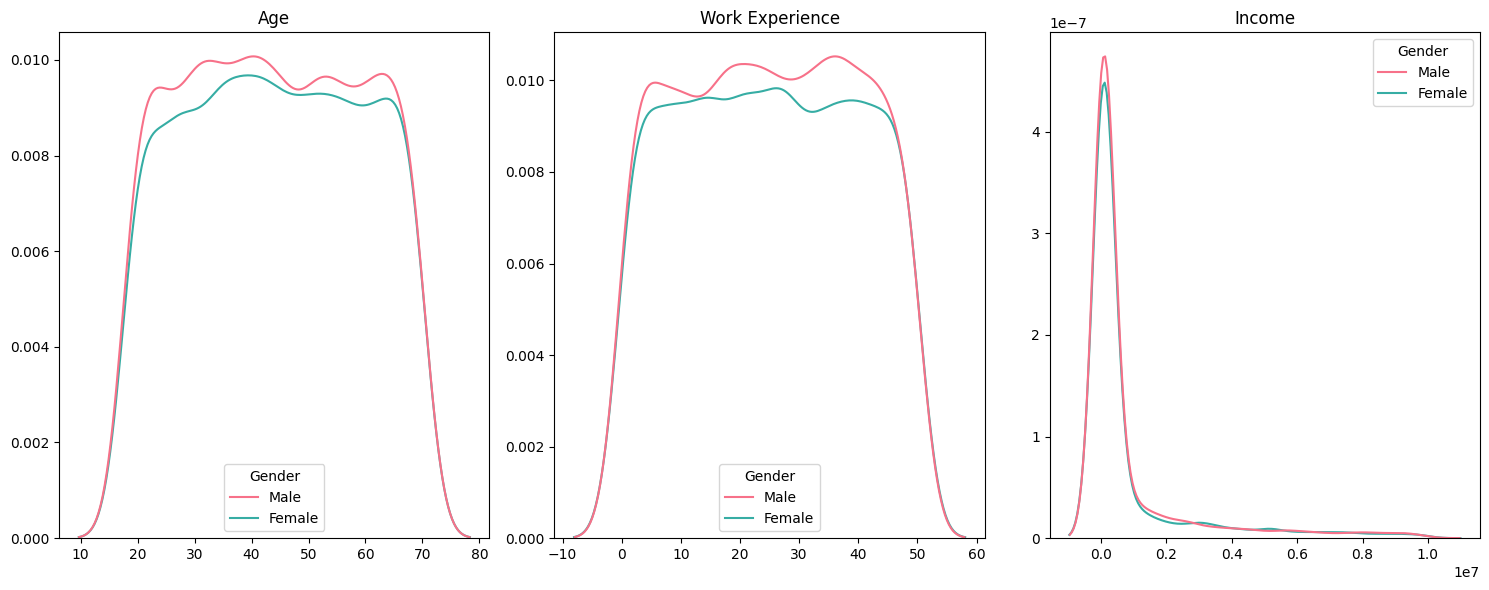

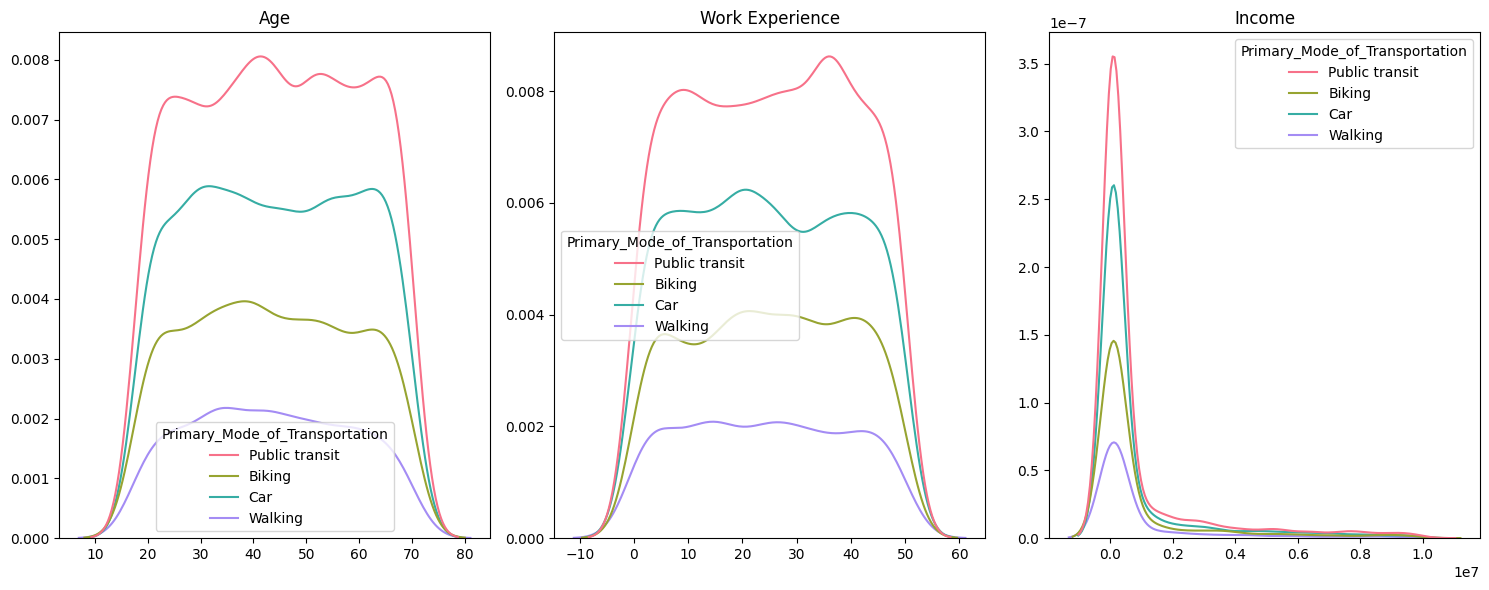

In [54]:
for k in cats:
    display(HTML("<h2>{}</h2>".format(k.replace('_', ' '))))
    fig, axes = plt.subplots(ncols = 3, figsize = (15, 6))
    
    for i, j in enumerate(nums):
        sns.kdeplot(df, x = j, hue = k, palette = 'husl', ax = axes[i])
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].set_title(j.replace('_', ' '))
    plt.tight_layout()
    plt.show()